In [323]:
#Import all required libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [324]:
#Decision tree.
df_train = pd.read_csv("spambase.csv")
print(type(dataset))
#dataset = np.array(dataset)
#print(dataset.shape)
df_test = df_train.sample(frac=0.2)
df_train = pd.concat([df_train, df_test]).drop_duplicates(keep = False)
df_test = np.array(df_test)
df_test_data = df_test[:,0:57]
df_test_target = df_test[:,-1]
df_test = pd.DataFrame(df_test)
#df_train = pd.concat([df_train, df_test])

df_test_data = pd.DataFrame(df_test_data)
df_test_target = pd.DataFrame(df_test_target)
data = dataset[:,0:57]
target = dataset[:,-1]


print(df_test_data.shape)

print(data.shape)
print(target.shape)
print(target)


<class 'numpy.ndarray'>
(920, 57)
(4600, 57)
(4600,)
[1. 1. 1. ... 0. 0. 0.]


   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.876087       0.876087      0.939130     0.911594   
1           0.888587       0.890217      0.921739     0.916848   
2           0.891925       0.902174      0.926087     0.912112   
3           0.906884       0.904348      0.911957     0.921014   
4           0.906522       0.916304      0.910435     0.918261   
5           0.910870       0.921739      0.917391     0.917391   
6           0.900000       0.923913      0.922981     0.923188   
7           0.914130       0.926087      0.912500     0.927174   
8           0.915217       0.925000      0.920773     0.926087   

   Training_Data_Size  Time_in_seconds  
0                10.0         0.004350  
1                20.0         0.006885  
2                30.0         0.011499  
3                40.0         0.012318  
4                50.0         0.013973  
5                60.0         0.015002  
6                70.0         0.018557  
7          

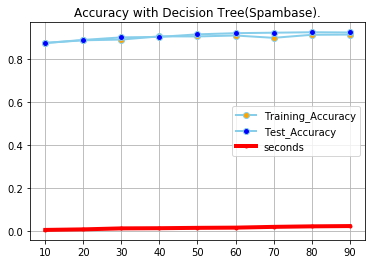

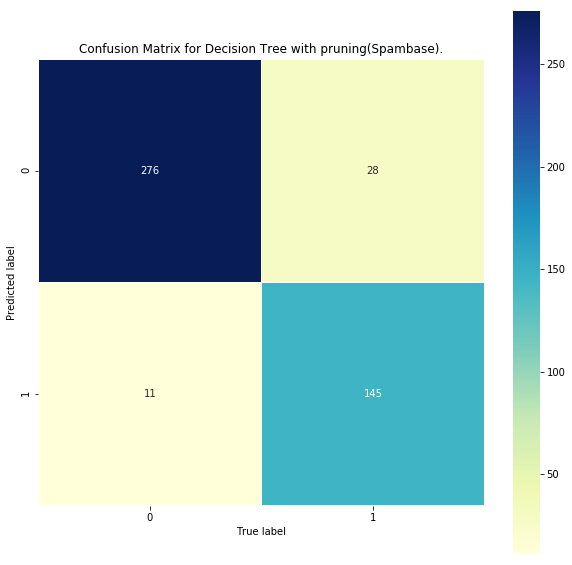

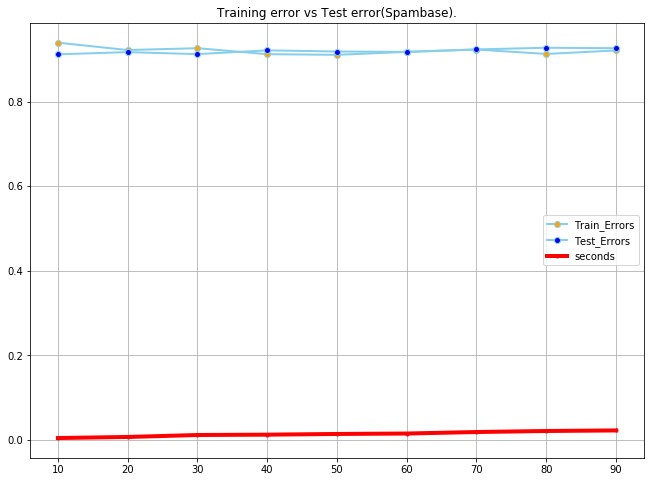

In [325]:
# Decision Tree and Pruning
index = 0
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy','Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds'])

# Applying Cross validations on training data
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10
    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data, target,test_size=test_size)
    tree = DecisionTreeClassifier(criterion="gini",
                 splitter="best",
                 max_depth=5,
                 min_samples_split=4,
                 min_samples_leaf=10,
                 min_weight_fraction_leaf=0.,
                 max_features=None,
                 random_state=4,
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 class_weight=None,
                 presort=False)
    tree.fit(X_train_DT, y_train_DT)
    t_d = (datetime.now() - t).total_seconds() 
    y_test_pred_DT = tree.predict(X_test_DT)
    y_test_dataset_pred = tree.predict(df_test_data)

    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_target, y_test_dataset_pred)
    training_errors = tree.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = tree.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    
#     print('Train Accuracy = ', train_accuracy_DT, 'Test Accuracy = ', test_accuracy_DT, ' Train Size = ', 
#           100-(size * 10), 'Test Size = ', test_size * 100, 'Time required = ', t_d )
    df_result.loc[index] = [training_accuracy , test_accuracy, training_errors, test_errors,100-(size * 10),t_d]
    index = index + 1
    
writer = pd.ExcelWriter('dt_spam.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='dt_spam')
writer.save()
print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='.', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds', data=df_result, marker='.', color='red', linewidth=4, label="seconds")
plt.legend()
plt.title("Accuracy with Decision Tree(Spambase).")
plt.grid(True)

# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
#print(mat_DT)
fig, ax = plt.subplots(figsize=(10,10))  
ax.set_title("Confusion Matrix for Decision Tree with pruning(Spambase).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=[0,1],
            yticklabels=[0,1],linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');

plt.figure(figsize=(11,8))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='.', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds', data=df_result, marker='.', color='red', linewidth=4, label="seconds")
plt.legend()
plt.title("Training error vs Test error(Spambase).")
plt.grid(True)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:351: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:351: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:351: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:351: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger tha

   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.422705       0.450000      0.445652     0.502899   
1           0.605707       0.600000      0.607609     0.605707   
2           0.602174       0.600000      0.615217     0.602174   
3           0.525000       0.504348      0.526630     0.606884   
4           0.605217       0.595652      0.606957     0.602609   
5           0.675543       0.657609      0.693478     0.696739   
6           0.590580       0.600000      0.612733     0.590580   
7           0.613043       0.600000      0.604348     0.464130   
8           0.636957       0.600000      0.602657     0.636957   

   Training_Data_Size  Time_in_seconds_by_10  
0                10.0               0.030484  
1                20.0               0.032236  
2                30.0               0.054999  
3                40.0               0.089055  
4                50.0               0.101784  
5                60.0               0.099157  
6         

Text(0.5, 1.0, 'Training and test error comparison for Neural network.Layer Size = 400 Batch Size = 10000')

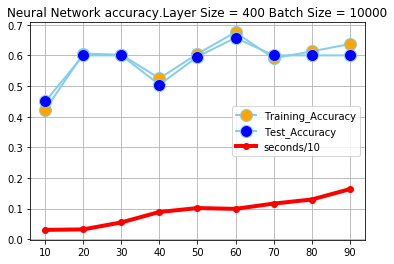

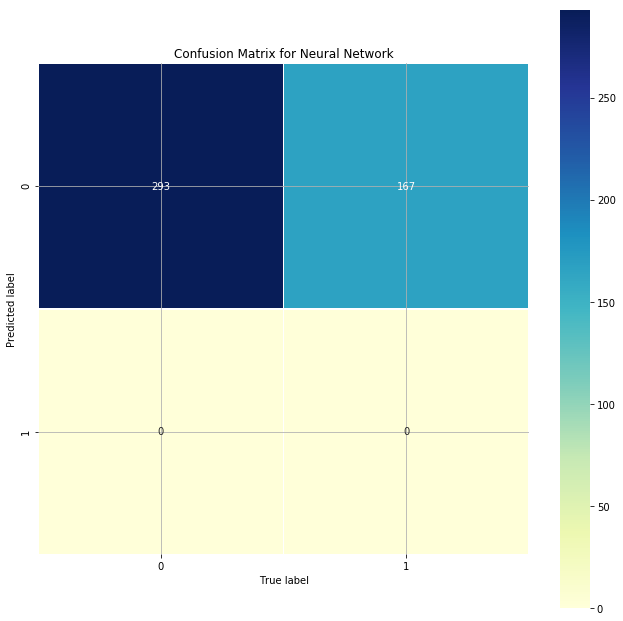

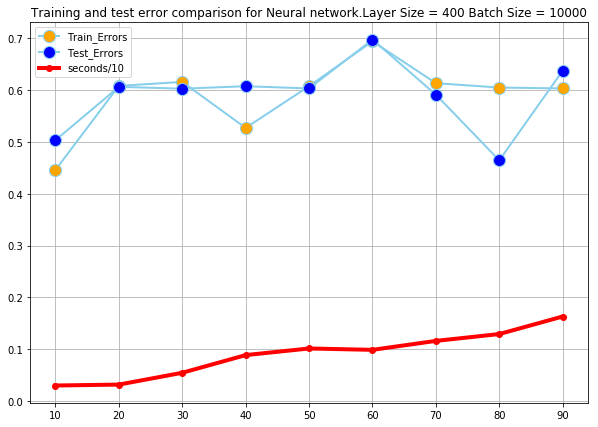

In [317]:
#### Neural networks
from sklearn import neural_network

# Cross validations on training set
index = 0
layer_size = 400
batch_size1 = 10000
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy', 'Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds_by_10'])
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data, target,test_size=test_size)
    nn = neural_network.MLPClassifier( hidden_layer_sizes=layer_size, activation='identity', solver='sgd',alpha=0.1, batch_size=batch_size1,
            learning_rate='adaptive',learning_rate_init=0.1,max_iter=10000,random_state=42, tol=0.001, momentum=0.5,early_stopping=True, 
            validation_fraction=0.01, beta_1=0.850, beta_2=0.2)
    
    nn.fit(X_train_DT, y_train_DT)
    y_test_pred_DT = nn.predict(X_test_DT)
    y_test_dataset_pred = nn.predict(df_test_data)
    t_d = (datetime.now() - t).total_seconds() / 10
    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_target, y_test_dataset_pred)   
    train_errors = nn.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = nn.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    df_result.loc[index] = [training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
    index = index + 1

writer = pd.ExcelWriter('neural_spam.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='neural_spam')
writer.save()
print(df_result)
     
# print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.grid(True)
plt.title("Neural Network accuracy(Spambase)."+"Layer Size = "+str(layer_size)+" Batch Size = "+str(batch_size1))

# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Neural Network(Spambase).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=[0,1],
            yticklabels=[0,1],linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.grid(True)

plt.figure(figsize=(10,7))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.grid(True)
plt.title("Training and test errors for Neural network(Spambase)."+"Layer Size = "+str(layer_size)+" Batch Size = "+str(batch_size1))


   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.916908       0.932609      0.991304     0.949275   
1           0.931793       0.942391      0.955435     0.948641   
2           0.937578       0.948913      0.957246     0.946273   
3           0.934420       0.943478      0.950543     0.948551   
4           0.942174       0.952174      0.948261     0.945217   
5           0.936413       0.947826      0.949275     0.950000   
6           0.933333       0.953261      0.951863     0.949275   
7           0.947826       0.953261      0.947826     0.951087   
8           0.934783       0.954348      0.948309     0.973913   

   Training_Data_Size  Time_in_seconds_by_10  
0                10.0               0.011482  
1                20.0               0.014210  
2                30.0               0.016899  
3                40.0               0.018810  
4                50.0               0.020685  
5                60.0               0.023403  
6         

Text(0.5, 1.0, 'Test and training errors for Boosting with AdaBoostClassifier(Spambase).')

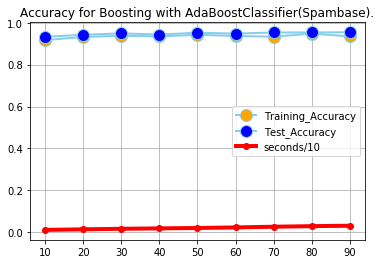

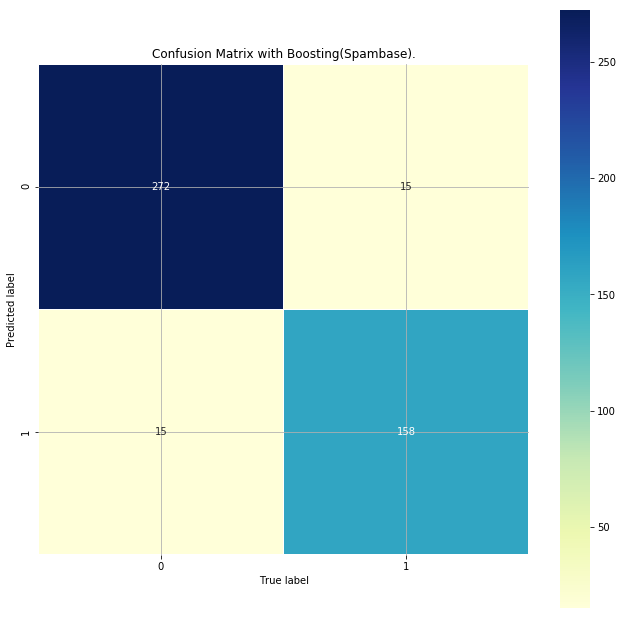

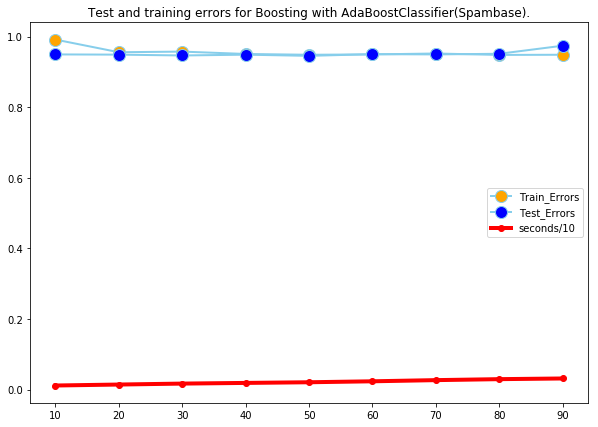

In [332]:
# Boosting with AdaBoostClassifier
from sklearn import ensemble
# Cross validations on training set
index = 0
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy', 'Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds_by_10'])
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data, target,test_size=test_size)
    boosting = ensemble.AdaBoostClassifier( base_estimator=None, n_estimators=50, learning_rate=0.4, algorithm='SAMME.R',
                 random_state=50)
    
    boosting.fit(X_train_DT, y_train_DT)
    y_test_pred_DT = boosting.predict(X_test_DT)
    y_test_dataset_pred = boosting.predict(df_test_data)
    t_d = (datetime.now() - t).total_seconds() / 10
    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_target, y_test_dataset_pred)    
    train_errors = boosting.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = boosting.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    df_result.loc[index] = [training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
    index = index + 1

writer = pd.ExcelWriter('boosting_spam.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='boosting_spam')
writer.save()
print(df_result)

    
# print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.grid(True)
plt.title("Accuracy for Boosting with AdaBoostClassifier(Spambase).")
# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix with Boosting(Spambase).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=[0,1],
            yticklabels=[0,1],linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.grid(True)



plt.figure(figsize=(10,7))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.title("Test and training errors for Boosting with AdaBoostClassifier(Spambase).")

In [77]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import stochastic_gradient, SGDClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.883092       0.877174      0.930435     0.897101   
1           0.910598       0.907609      0.926087     0.906522   
2           0.912112       0.904348      0.906522     0.918634   
3           0.902536       0.897826      0.909783     0.921739   
4           0.902609       0.905435      0.911304     0.905652   
5           0.907609       0.903261      0.910507     0.915217   
6           0.925362       0.913043      0.918012     0.913043   
7           0.895652       0.903261      0.902717     0.879348   
8           0.904348       0.902174      0.907729     0.941304   

   Training_Data_Size  Time_in_seconds_by_10  
0                10.0               0.050822  
1                20.0               0.091748  
2                30.0               0.211368  
3                40.0               0.288819  
4                50.0               0.358834  
5                60.0               0.486190  
6         

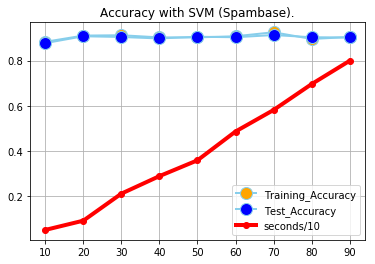

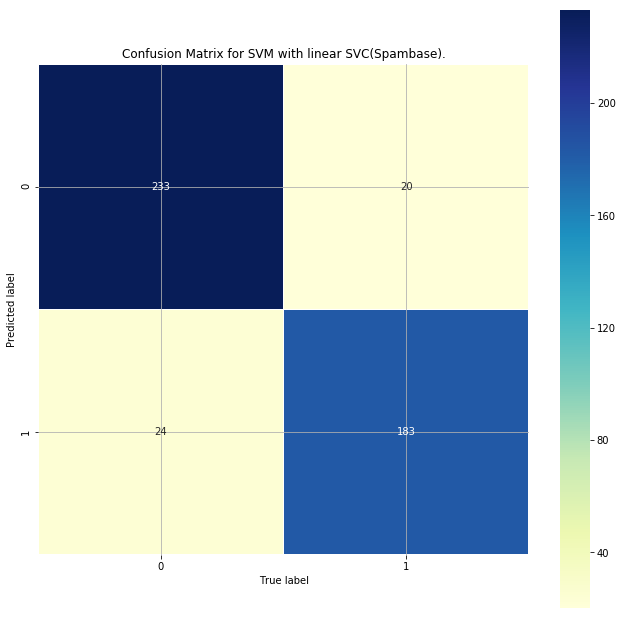

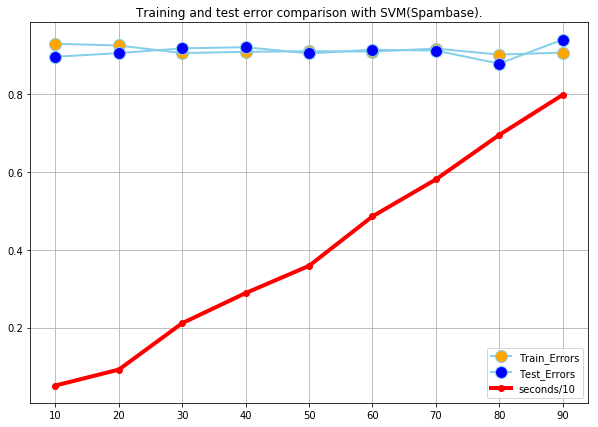

In [340]:
### Support Vector Machine.

index = 0
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy', 'Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds_by_10'])
# Cross validations on training set
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10

    # Processing SVM with linear SVC
    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data, target,test_size=test_size)
    linear_svc = svm.LinearSVC(random_state=42,C=1.0, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='squared_hinge', max_iter=50000,
         multi_class='ovr', penalty='l2', tol=0.01, verbose=0)
    #linear_tree = svm.SVC(kernel="linear",random_state=42)
    
    linear_svc.fit(X_train_DT, y_train_DT)
    y_test_pred_DT = linear_svc.predict(X_test_DT)
    y_test_dataset_pred = linear_svc.predict(df_test_data)
    t_d = (datetime.now() - t).total_seconds() / 10
    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_target, y_test_dataset_pred)
    train_errors = linear_svc.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = linear_svc.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    df_result.loc[index] = [training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
    index = index + 1

writer = pd.ExcelWriter('svm_spam.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='svm_spam')
writer.save()
print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.title("Accuracy with SVM (Spambase).")
plt.grid(True)

# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for SVM with linear SVC(Spambase).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=[0,1],
            yticklabels=[0,1],linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.grid(True)

# Classification Report
#cls_report = classification_report(y_test_DT, y_test_pred_DT, target_names=[0,1])
#print(cls_report)

plt.figure(figsize=(10,7))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.title("Training and test error comparison with SVM(Spambase).")
plt.grid(True)

   Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0           0.434541       0.430435      0.482609     0.716667   
1           0.645652       0.640217      0.677174     0.630163   
2           0.504658       0.521739      0.705072     0.690683   
3           0.603986       0.611957      0.644022     0.684058   
4           0.723913       0.710870      0.776522     0.500000   
5           0.682065       0.685870      0.614493     0.554891   
6           0.711594       0.714130      0.770497     0.614493   
7           0.772826       0.746739      0.660054     0.751087   
8           0.728261       0.763043      0.808213     0.819565   

   Training_Data_Size  Time_in_seconds_by_10  
0                10.0               0.000662  
1                20.0               0.000713  
2                30.0               0.000889  
3                40.0               0.000735  
4                50.0               0.001062  
5                60.0               0.000942  
6         

Text(0.5, 1.0, 'Training and test errors for SVM with RBF(Spambase).')

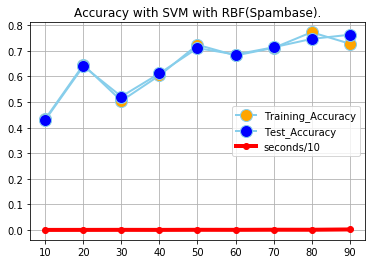

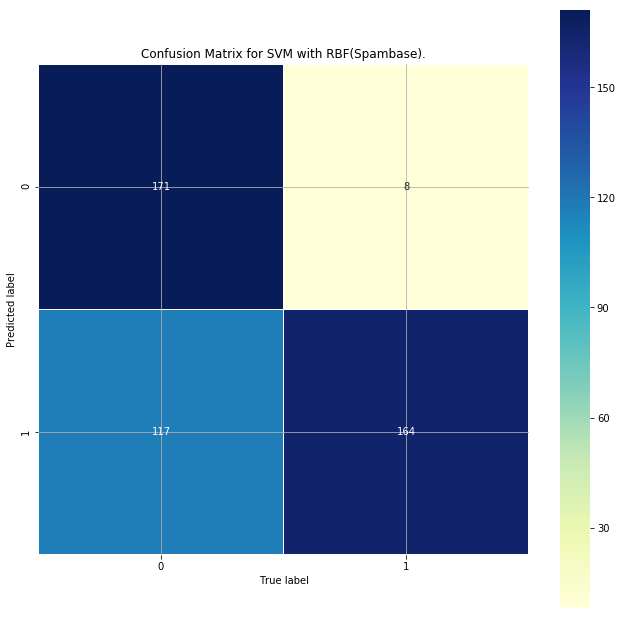

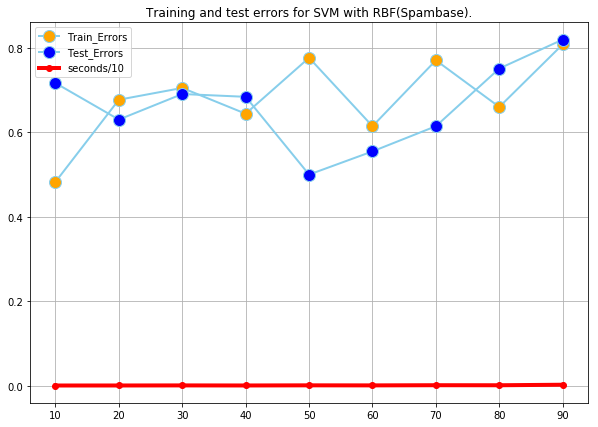

In [347]:
# Support Vector Machine with RBF 

index = 0
df_result = pd.DataFrame(columns=['Training_Accuracy','Test_Accuracy', 'Train_Errors','Test_Errors','Training_Data_Size', 'Time_in_seconds_by_10'])
r = np.arange(0.1,1.1,0.1)
for size in range (9,0,-1):
    t = datetime.now()
    test_size = size/10

    # Processing SVM with linear SVC
    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data, target,test_size=test_size)
    rbf = SGDClassifier(loss="hinge", penalty='l1', alpha=0.00000003, l1_ratio=0, fit_intercept=True, max_iter=500000, tol=0.0001, shuffle=True,
                 verbose=False, epsilon=stochastic_gradient.DEFAULT_EPSILON, n_jobs=3, random_state=None, learning_rate="optimal", eta0=0.0, power_t=0.5,
                 class_weight=None, warm_start=True, average=False)
    
    rbf.fit(X_train_DT, y_train_DT)
    y_test_pred_DT = rbf.predict(X_test_DT)
    y_test_dataset_pred = rbf.predict(df_test_data)
    t_d = (datetime.now() - t).total_seconds() / 10
    training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
    test_accuracy = accuracy_score(df_test_target, y_test_dataset_pred)    
    train_errors = rbf.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
    test_errors = rbf.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
    df_result.loc[index] = [training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
    index = index + 1

writer = pd.ExcelWriter('svm_rbf_spam.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='svm_rbf_spam')
writer.save()
print(df_result)
# Prediction on Test data set
rbf.predict(df_test_data)
    
# print(df_result)
plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.title("Accuracy with SVM with RBF(Spambase).")
plt.grid(True)

# Plot confusion matrix to understand prediction
mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for SVM with RBF(Spambase).")
sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=[0,1],
            yticklabels=[0,1],linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.grid(True)


plt.figure(figsize=(10,7))
plt.plot( 'Training_Data_Size', 'Train_Errors', data=df_result, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Test_Errors', data=df_result, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df_result, marker='o', color='red', linewidth=4, label="seconds/10")
plt.legend()
plt.grid(True)
plt.title("Training and test errors for SVM with RBF(Spambase).")

    K_Value  Training_Accuracy  Test_Accuracy  Train_Errors  Test_Errors  \
0       3.0           0.712802       0.717391      0.847826     0.899275   
3       3.0           0.766460       0.820652      0.882609     0.898758   
6       3.0           0.787391       0.840217      0.892174     0.883478   
9       3.0           0.814493       0.876087      0.893478     0.865942   
1       7.0           0.714251       0.711957      0.804348     0.850000   
4       7.0           0.764907       0.788043      0.822464     0.846273   
7       7.0           0.781739       0.804348      0.828261     0.836957   
10      7.0           0.805072       0.821739      0.840994     0.821739   
2      11.0           0.704831       0.701087      0.795652     0.831643   
5      11.0           0.753727       0.767391      0.798551     0.814596   
8      11.0           0.781304       0.786957      0.800435     0.820000   
11     11.0           0.785507       0.800000      0.810248     0.792754   

    Trainin

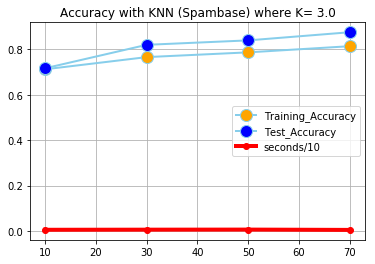

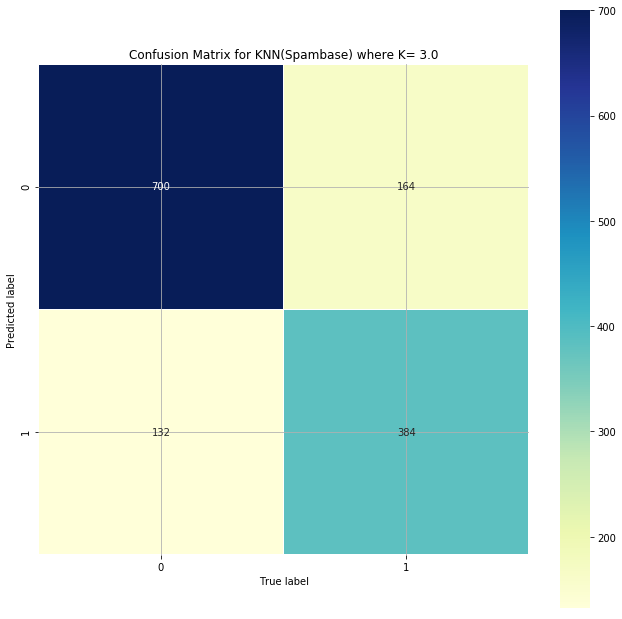

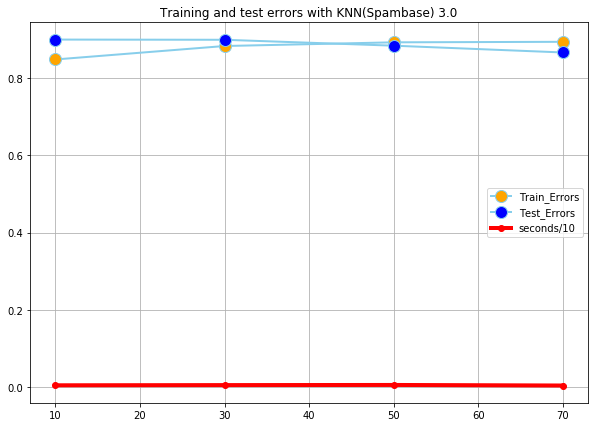

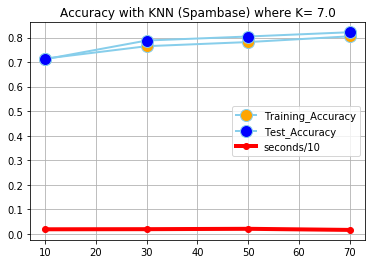

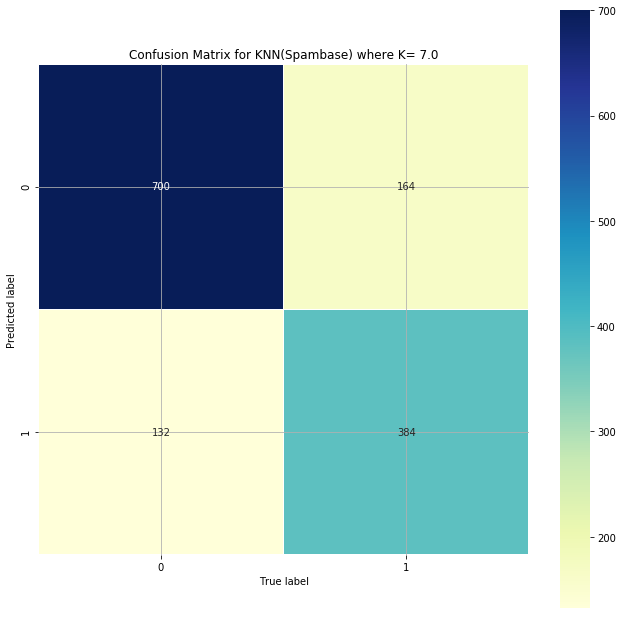

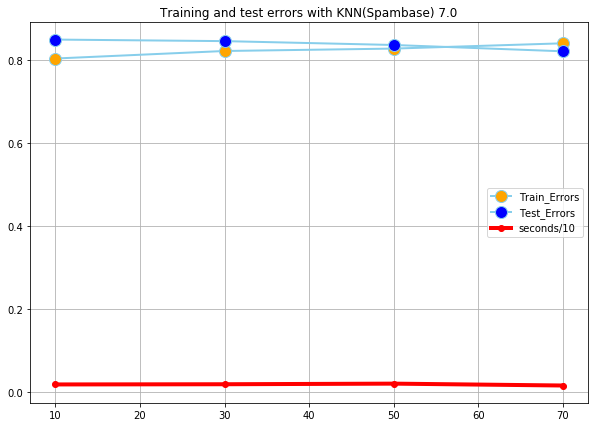

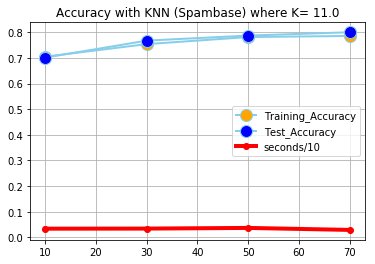

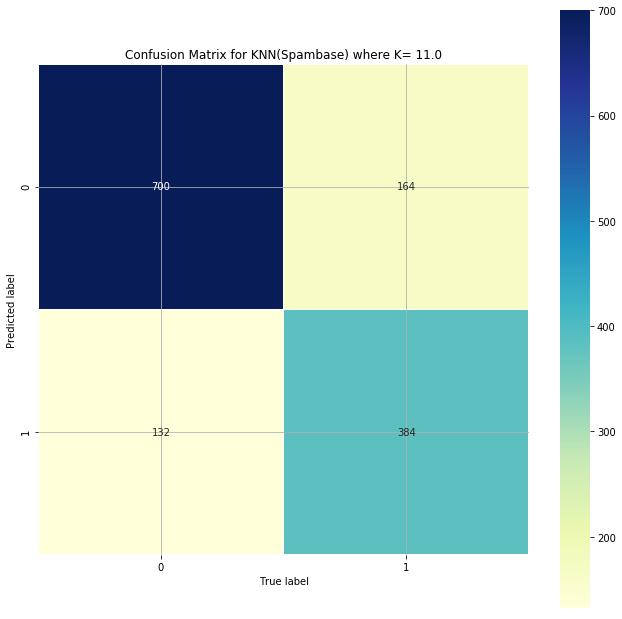

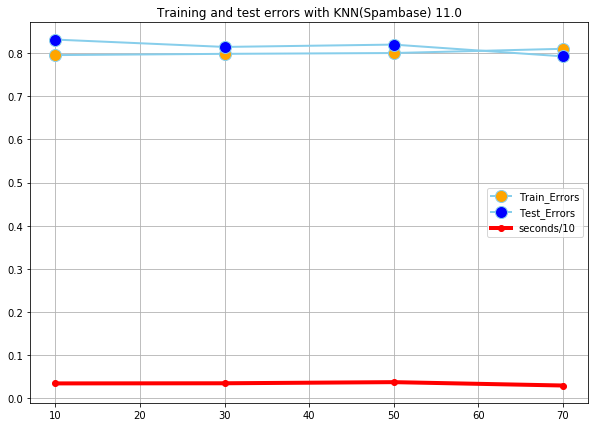

In [337]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

index=0
df_result = pd.DataFrame(columns=['K_Value','Training_Accuracy','Test_Accuracy','Train_Errors','Test_Errors','Training_Data_Size','Time_in_seconds_by_10'])
# Cross validations on training set
for size in range (9,2,-2):
    t = datetime.now()
    test_size = size/10

    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data, target,test_size=test_size)
    
    for k in range (3,12,4):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', leaf_size=15, p=2,
                 metric='minkowski', metric_params=None, n_jobs=1)
        knn_clf.fit(X_train_DT, y_train_DT)
        y_test_pred_DT = knn_clf.predict(X_test_DT)
        y_test_dataset_pred = knn_clf.predict(df_test_data)
        t_d = (datetime.now() - t).total_seconds() / 10
        training_accuracy = accuracy_score(y_test_DT, y_test_pred_DT)
        test_accuracy = accuracy_score(df_test_target, y_test_dataset_pred)       
        train_errors = knn_clf.fit(X_train_DT, y_train_DT).score(X_train_DT, y_train_DT)
        test_errors = knn_clf.fit(X_test_DT, y_test_DT).score(X_test_DT, y_test_DT)
        df_result.loc[index] = [k, training_accuracy , test_accuracy, train_errors, test_errors,100-(size * 10),t_d]
        index = index + 1

df_result = df_result.sort_values(by=['K_Value'])

writer = pd.ExcelWriter('knn_spam.xlsx', engine='xlsxwriter')
df_result.to_excel(writer, sheet_name='knn_spam')
writer.save()
print(df_result)

diff_k_values = pd.unique(df_result['K_Value'])
print(diff_k_values)

for k_v in diff_k_values:
    df1 = df_result["K_Value"]==k_v
    df2 = df_result[df1]
    df2 = df2.drop(['K_Value'],axis=1)
    
    plt.plot( 'Training_Data_Size', 'Training_Accuracy', data=df2, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'Training_Data_Size', 'Test_Accuracy', data=df2, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df2, marker='o', color='red', linewidth=4, label="seconds/10")
    plt.legend()
    title= "Accuracy with KNN (Spambase) where K= "+str(k_v)
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.close()

    # Plot confusion matrix to understand prediction
    mat_DT = confusion_matrix(y_test_DT, y_test_pred_DT)
    fig, ax = plt.subplots(figsize=(11,11))  
    ax.set_title("Confusion Matrix for KNN(Spambase) where K= "+str(k_v))
    sns.heatmap(mat_DT.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
                xticklabels=[0,1],
                yticklabels=[0,1],linewidths=.5, ax=ax)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    plt.grid(True)
    plt.show()
    plt.close()


    plt.figure(figsize=(10,7))
    plt.plot( 'Training_Data_Size', 'Train_Errors', data=df2, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'Training_Data_Size', 'Test_Errors', data=df2, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
    plt.plot( 'Training_Data_Size', 'Time_in_seconds_by_10', data=df2, marker='o', color='red', linewidth=4, label="seconds/10")
    plt.legend()
    plt.grid(True)
    title2= "Training and test errors with KNN(Spambase) "+str(k_v)
    plt.title(title2)
    plt.show()
    plt.close()
    

# df1 = df_result["K_Value"]==3.0
# df2 = df_result[df1]
# print(df2.drop(['K_Value'],axis=1))
    


# # Classification Report
# cls_report = classification_report(y_test_DT, y_test_pred_DT, target_names=cuisines)
# print(cls_report)